# $\mathrm{MGLYOX}$ (methylglyoxal)

In [1]:
using Pkg 
Pkg.activate("../")

  Activating project at `~/gitrepos/activepure/Photolysis.jl/mcm`


In [2]:
using Plots, MLPlotRecipes
using HDF5
using Tables, DataFrames, CSV
using MLJ, MLJGaussianProcesses
using StatsBase 
using KernelFunctions
using ParameterHandling

In [3]:
include("./utils.jl")

filter_outliers (generic function with 1 method)

In [4]:
# load in spectrometer data
hr4000_df = CSV.File("../hr4000_wavelengths.txt") |> DataFrame ; 

In [5]:
data = [
290	1	0.993030416
300	1	0.981081516
310	1	0.952710926
320	1	0.892510118
330	1	0.783124914
340	1	0.622525325
350	1	0.440624798
360	1	0.28161113
370	1	0.168454685
380	0.92	0.09696674
390	0.89	0.056109539
400	0.56	0.032126805
410	0.32	0.018768341
420	0.27	0.011457273
430	0.2	0.007092255
440	0.17	0.004497625    
]

λ = data[:,1]
Φ₁ = data[:,2]
Φ₂ = data[:,3]

16-element Vector{Float64}:
 0.993030416
 0.981081516
 0.952710926
 0.892510118
 0.783124914
 0.622525325
 0.440624798
 0.28161113
 0.168454685
 0.09696674
 0.056109539
 0.032126805
 0.018768341
 0.011457273
 0.007092255
 0.004497625

# Model Evaluation

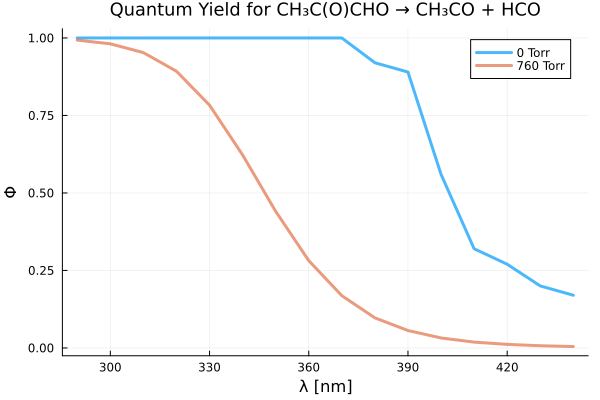

In [7]:
p = plot(
    λ,
    Φ₁,
    xlabel="λ [nm]",
    ylabel="Φ",
    alpha=0.7,
    lw=3,
    label="0 Torr",
    title="Quantum Yield for CH₃C(O)CHO → CH₃CO + HCO",
    titlefontsize=12,
)

plot!(
    λ,
    Φ₂,
    xlabel="λ [nm]",
    ylabel="Φ",
    alpha=0.7,
    lw=3,
    label="760 Torr",
    title="Quantum Yield for CH₃C(O)CHO → CH₃CO + HCO",
    titlefontsize=12,
)
